In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
energy = pd.read_csv(root_dir + '/data/energy.csv', header=None).iloc[:, 0].values
j = 150
X_train = energy[3_000 + j: 13_000 + j]
Y_true = energy[13_000 + j: 14_000 + j]

## Get patterns and motifs

In [5]:
with open('../01_wishart_motifs/wishart-motifs-energy-half.pickle', 'rb') as f:
    wishart_motifs = pickle.load(f)

## Algorithm

In [6]:
trajectory_length = 50

trajectory, possible_predictions = daemon(
    trajectory_length = trajectory_length,
    X_train = X_train,
    Y_true = Y_true,
    motifs = wishart_motifs,
    distance_eps = 0.01,
    cluster_eps = 0.01,
    min_samples = 5,
    cluster_1_proportion_threshold = -1,
    clusters_diff_threshold = -1,
    sigma = 0.0,
    return_possible_predictions = True,
    daemon_eps = 0.05
)

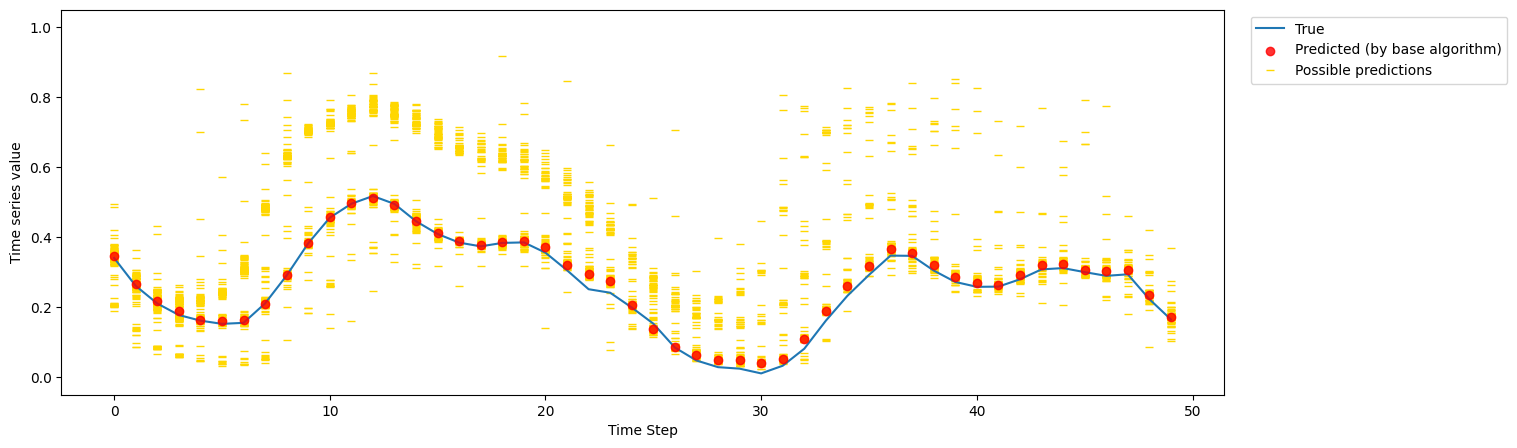

In [7]:
plt.figure(figsize=(15, 5))
plot_Y_true(Y_true[:trajectory_length])
plot_predictions(trajectory)
plot_possible_predictions(possible_predictions)
plt.ylim(top=1.05)
plt.ylim(bottom=-0.05)
plt.xlabel('Time Step')
plt.ylabel('Time series value')
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
trajectory_length = 50
n = 96 * 9   # the number of iterations required to traverse Y_true

inputs = []
for i in range(n):
    _X_train = np.append(X_train, Y_true[:i])
    _Y_true = Y_true[i: i + trajectory_length]
    _input = (
        trajectory_length, 
        _X_train,
        _Y_true,
        wishart_motifs
    )   
    inputs.append(_input)


def task(x):
    trajectory_length, X_train, Y_true, motifs = x
    trajectory, possible_predictions = daemon(
        trajectory_length = trajectory_length,
        X_train = X_train,
        Y_true = Y_true,
        motifs =  motifs,
        distance_eps = 0.01,
        cluster_eps = 0.01,
        min_samples = 5,
        cluster_1_proportion_threshold = -1,
        clusters_diff_threshold = -1,
        sigma = 0.0,
        return_possible_predictions = True,
        daemon_eps = 0.05
    )
    return trajectory, possible_predictions


results = run_concurrently(task, inputs)

In [ ]:
with open('results-w-e-daemon-1.pickle', 'wb') as f:
    pickle.dump(results, f)